# Oblig 2 FYS2160 - Lasse Pladsen
## 1. THE EINSTEIN CRYSTAL
### B.a) 
With $N=3$ oscillators and $q=3$ the following microstates are shown in matrix form with the columns representing an oscillator with the value representing $q$, meaning the rows are the different microstates:
\begin{gather*}
    \begin{pmatrix} 
        q_1 & q_2 & q_3 \\
        0 & 0 & 3
     \\ 0 & 3 & 0
     \\ 3 & 0 & 0
     \\ 0 & 1 & 2
     \\ 1 & 0 & 2
     \\ 0 & 2 & 1
     \\ 1 & 2 & 0
     \\ 2 & 1 & 0
     \\ 2 & 0 & 1
     \\ 1 & 1 & 1
     \end{pmatrix}
\end{gather*}

### B.b)
\begin{gather*}
    \Omega(N=3,q=3)=\frac{(3+3-1)!}{3!(3-1)!} = \frac{(5)!}{3!(2)!} = 10
\end{gather*}
which is correct and consistent with the number of microstates (number of rows) in the above matrix from Ba).

### B.c)
I will write this two-crystal system as a matrix multiplication $A\ B$, where each matrix represents an Einstein crystal system, and again the columns are the oscillators and the rows are the microstates. We will ignore the problem where the matrix dimensions don't add up so we really cant multiply them. This is just my easy way of listing out the microstates. We have $N_A=2, q_A=5, N_B=2, q_B=1$:
\begin{gather*}
    \begin{pmatrix} 
       q_{A1} & q_{A2} \\
       0 & 5 \\
       5 & 0 \\
       1 & 4 \\
       4 & 1 \\
       2 & 3 \\
       3 & 2 \\
    \end{pmatrix}
    \begin{pmatrix}
       q_{B1} & q_{B2} \\
       0 & 1
    \\ 1 & 0
    \end{pmatrix}
\end{gather*} 

### B.d)
For $q=6$ we have the possible values of the two sub-energies $q_A$ and $q_B$ being
\begin{gather*}
    \begin{pmatrix}
       q_A & q_B \\
       0 & 6 \\
       6 & 0 \\
       1 & 5 \\
       5 & 1 \\
       2 & 4 \\
       4 & 2 \\
       3 & 3 \\ 
    \end{pmatrix}
\end{gather*}
where the columns represent system A and B, and the values $q_A$ and $q_B$.

### B.e)
We want the multiplicity $\Omega$ for each $(q_A, q_B)$ pair, I will write a function using the given formula in equation (6) of the oblig.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from math import factorial

def einstein_multiplicity(N, q):
    return factorial(N + q - 1) / (factorial(q) * factorial(N - 1))

Since every $q_B$ value is correlated with $q_A$ we can simply write the function as $\Omega(N_A,q_A)$ and give the multiplicity of a single macrostate $q_A$. I will now expand the program to simulate the coupled Einstein crystals. Since the two crystals are in thermal contact and therefore dependant on each other, the total multiplicity of a macrostate $q_A$ will therefore be the product of each of the systems multiplicity:
\begin{equation}
$\Omega_{tot}(N_A, N_B, q_A) = \Omega_A(N_A,q_A) \cdot \Omega_B(N_B,(q-q_A))
\end{equation}
I will implement this in a coupled Einstein crystal class:

In [7]:
class Coupled_Einstein_Solids:
    def __init__(self, N_A, N_B, q):
        self.N_A = N_A
        self.N_B = N_B
        self.q = q

    def omega_a(self, q_A):
        return einstein_multiplicity(self.N_A, q_A)

    def omega_b(self, q_A):
        return einstein_multiplicity(self.N_B, self.q - q_A)

    def omega_tot(self, q_A):
        return self.omega_a(q_A) * self.omega_b(q_A)

Of course we must have that the values are integers greater than zero, and that $q_A\le q$, so this could be added as an error handling function at another time. We can test this with $N_A=N_B=2$ and for example $q_A=0,2,5,6$. From equation (6) in the oblig we this should give the following values respectively:
\begin{gather*}
    \Omega_{tot} = \Omega_A\ \Omega_B = \frac{(0+2-1)!}{0!(2-1)!} \cdot \frac{(6+2-1)!}{6!(2-1)!} = 1 \cdot 7 = 7
    \\ \Omega_{tot} = \frac{(2+2-1)!}{2!(2-1)!} \cdot \frac{(4+2-1)!}{4!(2-1)!} = 3 \cdot 5 = 15
    \\ \Omega_{tot} = \frac{(5+2-1)!}{5!(2-1)!} \cdot \frac{(1+2-1)!}{1!(2-1)!} = 6 \cdot 2 = 12
    \\ \Omega_{tot} = \frac{(6+2-1)!}{6!(2-1)!} \cdot \frac{(0+2-1)!}{0!(2-1)!} = 7 \cdot 1 = 7
\end{gather*}


In [8]:
a = Coupled_Einstein_Solids(2, 2, 6)
for q_Ai in [0, 2, 5, 6]:
    print(a.omega_tot(q_Ai))

7.0
15.0
12.0
7.0


Which we here see is correct. Then to find the probabilites we will need to calculate the total number of $\Omega_{tot}$ for all values of $q_A$ for a given $N_a,N_B,q$, assuming that each microstate are equally probable:


In [9]:
class Coupled_Einstein_Solids(Coupled_Einstein_Solids):
    def __init__(self, N_A, N_B, q):
        super().__init__(N_A, N_B, q)
        
        # calculate total multiplicity (omega) for all macrostates (total number of microstates) of given values N_A, N_B, and q:
        self.omega_all = 0
        for q_A in range(self.q + 1):  # q_A = 0, 1, ... , q
            self.omega_all += self.omega_tot(q_A)
            
    def probability(self, q_A):
        return self.omega_tot(q_A) / self.omega_all
    

Lets then print each probability 

In [10]:
a = Coupled_Einstein_Solids(2, 2, 6)
for q_Ai in range(7):
    print(f"P(q_A={q_Ai}) = {a.probability(q_Ai)*100:.2f} %.")

P(q_A=0) = 8.33 %.
P(q_A=1) = 14.29 %.
P(q_A=2) = 17.86 %.
P(q_A=3) = 19.05 %.
P(q_A=4) = 17.86 %.
P(q_A=5) = 14.29 %.
P(q_A=6) = 8.33 %.


### B.f)
Before the system came in contact we see from B.c) that we have 6 microstates in system A and 2 in system B giving the total number of microstates as $6\cdot2=14$. Then after the systems came in contact we have:

In [11]:
a.omega_all

84.0

84 total number of microstates, which is 6 times as many from before contact, which is equal to our $q$-value. If we test another system with $q=2$ we will before contact have the following amount of microstates:
\begin{gather*}
    \Omega(2, 2) \cdot \Omega(2, 1)= \frac{(2+2-1)!}{2!(2-1)!} \cdot \frac{(1+2-1)!}{1!(2-1)!} = 3\cdot 2 = 5
\end{gather*}
and from our code we have

In [12]:
b = Coupled_Einstein_Solids(2, 2, 3)
b.omega_all

20.0

which is 4 as many, which leads me to believe that the earlier matching of number of microstates before and after contact with $q=6$ was a coincidence.

### B.g)
We extend our code

Highest probability: q_A = 50 with P = 5.62 %


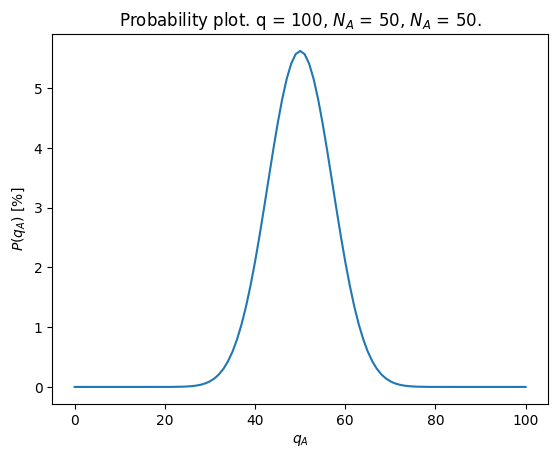

In [13]:
class Coupled_Einstein_Solids(Coupled_Einstein_Solids):
    def probability_plot(self):
        P_list = np.zeros(self.q+1)
        q_A_list = np.arange(0, self.q+1)
        for i, q_A in enumerate(q_A_list):
            P_list[i] = self.probability(q_A) * 100
    
        # Plot
        plt.plot(q_A_list, P_list)
        plt.xlabel("$q_A$")
        plt.ylabel("$P(q_A)$ [%]")
        plt.title(f"Probability plot. q = {self.q}, $N_A$ = {self.N_A}, $N_A$ = {self.N_A}.")
        max_index = np.argmax(P_list)
        print(f"Highest probability: q_A = {q_A_list[max_index]:.0f} with P = {P_list[max_index]:.2f} %")

a = Coupled_Einstein_Solids(50, 50, 100)
a.probability_plot()

The most probable macrostate is $q_A=q_B=50$ with probability $P(50)=5.62\%$.

### C.a)
First we take the natural logarithm, then use $N>>1$:
\begin{gather*}
    \ln\Omega(N,q) = \ln\left(\frac{(q+N-1)!}{q!(N-1)!}\right)
    \\ \simeq \ln\left(\frac{(q+N)!}{q!N!}\right)
    \\ = \ln(q+N)! - \ln q! - \ln N!
\end{gather*}
here we use Stirling's approximation:
\begin{gather*}
    \simeq (q+N)(\ln (q+N) - 1) - q(\ln q -1)  - N(\ln N -1 )
\end{gather*}
\begin{gather*}
    = (q+N)\left(\ln \left[q\left(1+\frac{N}{q}\right)\right] - 1\right) - q(\ln q -1)  - N(\ln N -1 )
    \\ = (q+N)\left(\ln q + \ln\left(1+\frac{N}{q}\right) - 1\right) - q(\ln q -1)  - N(\ln N -1 )
\end{gather*}
now we use that $N/q<<1$ with the first order Taylor expansion on $\ln (1+N/q)$:
\begin{gather*}
    \simeq (q+N) \left( \ln q + \frac{N}{q} - 1\right) - q(\ln q - 1)  - N(\ln N -1 )
    \\ = q\ln q + N\ln q + N + \frac{N^2}{q} - q - N - q \ln q + q - N \ln N + N 
    \\ = N \ln q + \frac{N^2}{q} + N - N\ln N
    \\ = N\ln\frac{q}{N}  + \frac{N^2}{q} + N 
    \\ = N \left( \ln\frac{q}{N} + \frac{N}{q} + 1\right)
\end{gather*} 
again we use $N/q << 1$:
\begin{equation}
     \Rightarrow \ln\Omega(N,q) = N \left( \ln\frac{q}{N} + 1\right)
\end{equation} 
which is the simplified formula I needed to show.

### C.b)
Boltzmann's formula for entropy is defined as
\begin{equation}
    S = k\ln\Omega
\end{equation}
So we combine the two previous formulas into an expression for the entropy of the Einstein crystal as:
\begin{equation}
    S = k N \left( \ln\frac{q}{N} + 1\right)
\end{equation}

### C.c)
 We put the previous formula into $\frac{\partial S}{\partial U} = \frac{1}{T}$ and manipulate it as such:
 \begin{gather*}
    \frac{1}{T} = \frac{\partial S}{\partial U} = \frac{\partial S}{\partial q} \frac{\partial q}{\partial U} 
 \end{gather*}
 here we use that equation (4) for $q$ from the oblig. We can now differentiate $S$ and $q$:
  \begin{gather*}
    = kN\frac{1}{q}\ \frac{1}{\epsilon}
    \\ = \frac{kN}{\epsilon q}
 \end{gather*}
 meaning that we have our expression
 \begin{equation}
    T = \frac{k}{\epsilon} \frac{q}{N}
 \end{equation}
 This means that the temperature is proportional to the energy value $q$ which seems correct. Then its also inversely proportional with the oscillator count $N$ which may also seem correct. Thinking of an exmaple; if we hold $q$ constant and increase the count $N$ then there will be more oscillators to split the same energy over, meaning less energy per oscillator. This is the analogous to having less average kinetic energy per particle which we know equals less temperature. Therefore this seems right with the equation.
 
In addition, from equation (4) of the oblig we have that 
\begin{gather*}
    \frac{q}{N} = \frac{1}{N} \sum_{i=1}^N n_i
\end{gather*}
which we idenfity as the average energy level $\bar{n}$, which makes sense to be proportional to the temperature.

## II. THE SPIN SYSTEM
### B.a)
???

### B.b)
The total energy will be the sum of each of the energies:
\begin{equation}
    E_{tot} = \sum_{i=1}^N E_i = -\mu B \sum_{i=1}^N S_i = -\mu B s
\end{equation}

### B.c)

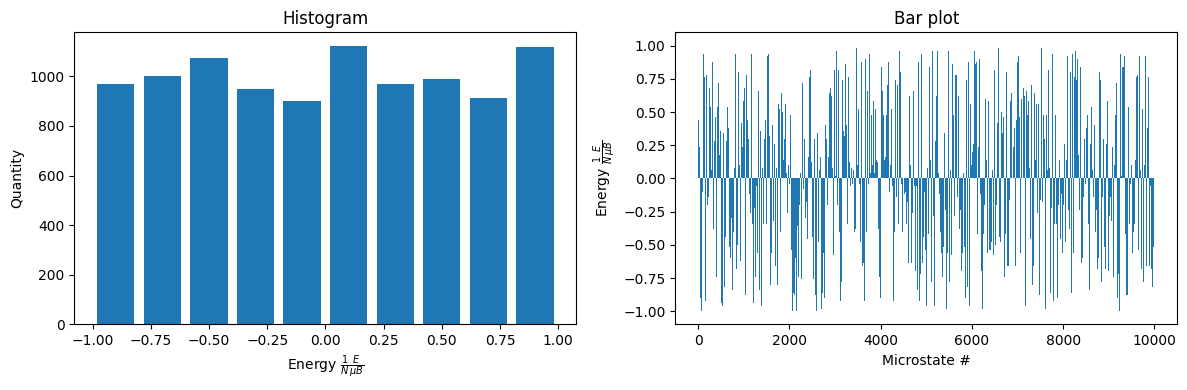

In [76]:
## PARAMETERS
M = 10000  # number of microstates to generate
N = 50  # number of spins/particles per microstate

# For each microstate, generate random total unitless energy with values in [-N, N] from a uniform dist
E = np.random.randint(-N, N+1, M)

## Plotting
plt.figure(figsize=(12, 4))

# Hist plot
plt.subplot(1, 2, 1)
plt.title("Histogram")
plt.hist(E/N, rwidth=0.8)
plt.xlabel(r"Energy $\frac{1}{N}\frac{E}{\mu B}$")
plt.ylabel("Quantity")

# Bar plot
plt.subplot(1, 2, 2)
plt.title("Bar plot")
plt.bar(range(1, M+1), E/N, width=1)
plt.xlabel("Microstate #")
plt.ylabel(r"Energy $\frac{1}{N}\frac{E}{\mu B}$")

plt.tight_layout()

### B.d)
The multiplicity of a binary/two-state system like we have here ($S_i$ is either $S_+$ or $S_-$) is generally
\begin{equation}
    \Omega(N, S_+) = \begin{pmatrix} N  \\ S_+ \end{pmatrix} = \frac{N!}{S_+!(N-S_+)!} = \frac{N!}{S_+!S_-!}
\end{equation}
where I use $N=S_+ + S_-$ which gives us what we wanted to show.

### B.e)
From $2s=S_+-S_-$ we combine $S_-=S_+-2s$ with $S_+=N-S_-$ and get:
\begin{gather*}
    S_+ = N - S_- = N - S_+ + 2s
    \\ 2S_+ = N + 2s
    \\ S_+ = \frac{N}{2} + s
\end{gather*}
and the same for $S_-$:
\begin{gather*}
    S_- = N - S_+ = N - 2s - S_-
    \\ 2S_- = N - 2s
    \\ S_- = \frac{N}{2} - s
\end{gather*}
we put this into the above equation then we get what we wanted to show:
\begin{equation}
    \Omega(N,s) = \frac{N!}{\left(\frac{N}{2} + s\right)!\left(\frac{N}{2} - s\right)!}
\end{equation}

### B.f)
By mapping this problem onto the Einstein-solid problem that had the following expression
\begin{equation*}
    \ln\Omega(N,q) = N \left( \ln\frac{q}{N} + 1\right)
\end{equation*}
then by solving for $\Omega$ we get
\begin{gather*}
    \Omega(N,s) = e^{N \left( \ln\frac{s}{N} + 1\right)} \ \ \  ??
\end{gather*}

...

### B.g)
Below I plot the $\Omega(N,s$ function

Text(0, 0.5, '$\\Omega(N,s)/\\Omega(N,0)$')

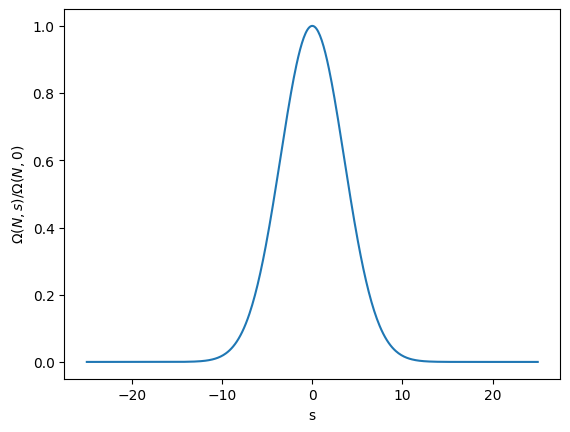

In [82]:
s = 0.5*np.linspace(-N, N, 500)
plt.plot(s, np.exp(-2*s*s/N))
plt.xlabel("s")
plt.ylabel("$\Omega(N,s)/\Omega(N,0)$")

........................................

## REFERENCES
 Schroeder, Daniel V., $\textit{An Introduction to Thermal Physics}$ (Oxford, 2021; online edn, Oxford Academic, 18 Mar. 2021), https://doi.org/10.1093/oso/9780192895547.001.0001, accessed 6 Sept. 2023. 